In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, IntSlider, FloatSlider, fixed

## Generalised lotka volterra model

The Generalized Lotka-Volterra equations extend this model to include more species and more complex interactions, including competition, mutualism, and others. In its more general form, the equations can be written to model n species interacting in an ecosystem, not limited to two-species predator-prey dynamics. This generalization allows for the inclusion of various types of interactions such as mutualism, predations, competition etc and the study of more complex ecological and biological systems.

#### General equation
$$ \frac{dx_i}{dt} = x_i f_i(x) $$

- f = r + Ax 

- where 
    - r  is a vector and 
    - A is a matrix known as the interaction matrix

#### The Generalized Lotka-Volterra Equations for $n$ species could also be written as:
$$ \frac{dX_i}{dt} = X_i \left( r_i + \sum_{j=1}^{n} a_{ij} X_j \right) $$

Where:
- $X_i$ is the population size of species $i$
- $r_i$ is the growth rate of species $1$
- $a_{ij}$ is the effect of species $j$ on species $i$, with:
    - $a_{ij}$ < 0$ indicating a negative impact (e.g. competition or predation)
    - $a_{ij}$ > 0$ indicating a positive impact (e.g. mutualism) 

In [3]:
# Function for Generalized lotka-volterra model

def generalized_lotka_volterra(X, t, growth_rates, interactions):
    return [x * (growth_rates[i] + sum([interactions[i][j] * X[j] for j in range(len(X))])) for i, x in enumerate(X)]

### Implement Generalized lotka-volterra model for different population dynamics (Mutualism or Co-existence)

**Mutualism:**
Mutualism is a type of cooperation where both parties gain direct and significant benefits essential for their survival or fitness. 

**Coexistence:**
Coexistence refers to the situation where multiple species live together in the same environment without any major interactions that negatively impact their survival. The species share the environment, sometimes competing but often occupying different ecological niches, thereby reducing direct competition and allowing them to coexist.

In [4]:
# Initial populations
initial_population = [10, 5, 3]

# Intrinsic growth rates
growth_rates = [1.1, -0.4, 0.5]

# Interaction matrix
interactions = [[-0.1, 0.5, -0.3],
                [-0.4, -0.2, 0.5],
                [0.3, -0.5, -0.1]]

# Time points
time = np.linspace(0, 20, 1000)

In [5]:
coporative=odeint(generalized_lotka_volterra,initial_population,time,args=(growth_rates,interactions))

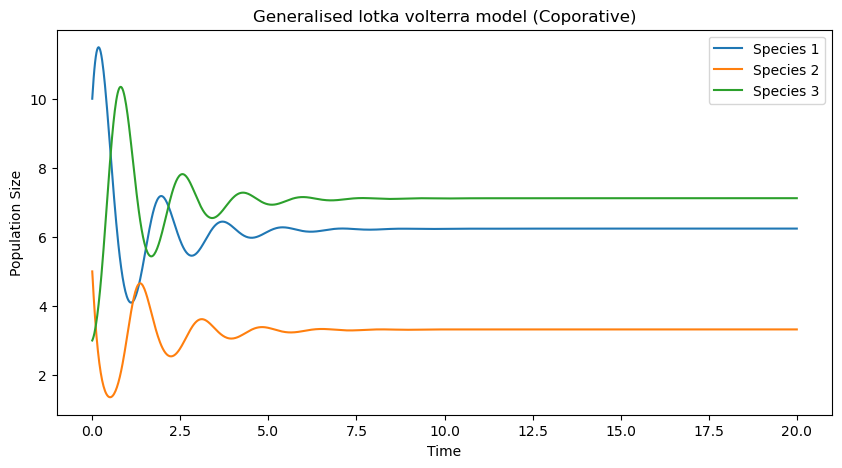

In [6]:
## plot for all the species
plt.figure(figsize=(10,5))
for i in range(len(initial_population)):
   plt.plot(time,coporative[:,i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.title('Generalised lotka volterra model (Coporative)')
plt.show()

In the above figure, species 3 (green) outgrows the other species even though the these species had higher initial populations. This may be suggestive that species 3 has a competive advantage over species 1 and species 2. However, since species 1 and 2 do not go into extintion but rather have a stable growth a time 7.5 suggest the stable co-existence of the three species in the system.  

### Implement Generalized lotka-volterra model for different population dynamics (Competition)
Competition is an interaction between organisms or species in which both are negatively affected due to their need for the same limited resource, such as food, which often result in the species with competitive advantange surviving and other species dying. 

In [64]:
# Initial populations
initial_population = [10, 10]

# Intrinsic growth rates
growth_rates = [5, 5]

# Interaction matrix
interactions = [[1, -3],
                [1, -1]]

# Time points
time = np.linspace(0, 20, 1000)

In [65]:
competitive=odeint(generalized_lotka_volterra,initial_population,time,args=(growth_rates,interactions))

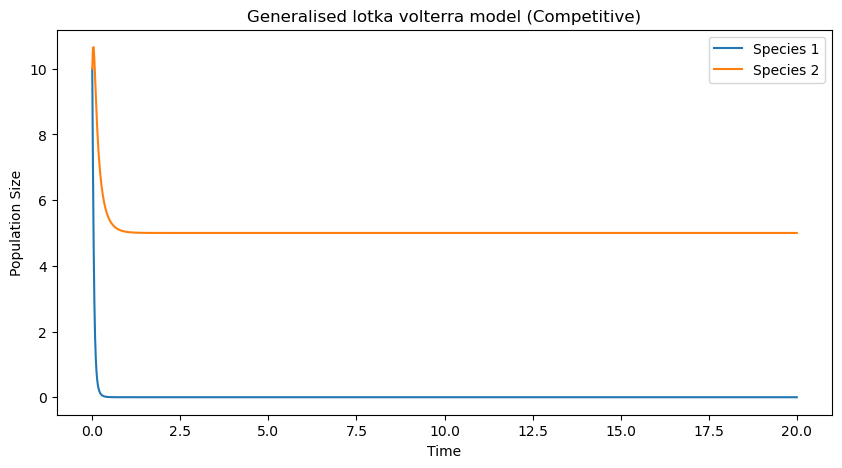

In [66]:
## plot for all the species
plt.figure(figsize=(10,5))
for i in range(len(initial_population)):
   plt.plot(time,competitive[:,i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.title('Generalised lotka volterra model (Competitive)')
plt.show()

In the above figure, species 2 (orange) outgrows the species 1 even though they both had same initial populations. The decline in the population of both species is as a result of negative interation between these species (-3, -1). Since, species 2 have a higher negative effect on species 1, it outcompete it and grow in the enviromnet while species 1 die out, even though the both have the same growth rate and affect themselves positively. 

## Quiver Plots

In [67]:
# make a reusable function
def simulate_gLV(initial_populations, growth_rates, interactions, total_time=20):
    t = np.linspace(0, total_time, 1000)
    solution = odeint(generalized_lotka_volterra, initial_populations, t, args=(growth_rates, interactions))
    return (solution, t)

def plot_timeseries_gLV(result):
    solution = result[0]
    t = result[1]
    n_species = len(solution[1,:])
    plt.plot(t, solution)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Generalized Lotka-Volterra Model')
    plt.legend([f'Species {i}' for i in range(n_species)])
    plt.show()

def plot_quiver_2D(initial_populations, growth_rates, interactions, total_time=15):
    t = np.linspace(0, total_time, 100000) 
    
    # initial_conditions = [P0, V0]
    trajectory = odeint(generalized_lotka_volterra, initial_populations, t, args=(growth_rates, interactions))
    max_1 = max(trajectory[:,0])
    max_2 = max(trajectory[:,1])

    values_1 = np.linspace(0, max_1, 20)
    values_2 = np.linspace(0, max_2, 20)
    PP, VV = np.meshgrid(values_1, values_2)
    dP, dV = generalized_lotka_volterra([PP, VV], 0, growth_rates, interactions)

    fig, ax = plt.subplots()
    ax.quiver(PP, VV, dP, dV, color='blue')
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-')
    ax.set_xlim([-0.1 * max_1, max_1 * 1.1])
    ax.set_ylim([-0.1 * max_2, max_2 * 1.1])
    ax.set_xlabel('Species 1')
    ax.set_ylabel('Species 2')
    ax.set_title('Lotka-Volterra Model')
    plt.show()

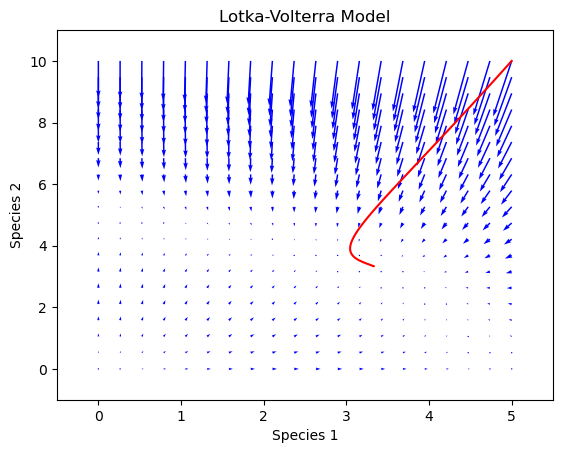

In [68]:
initial_populations = [5, 10]
growth_rates = [1.0, 1.0]
interactions = [[-0.2, -0.1], [-0.1, -0.2]]
plot_quiver_2D(initial_populations, growth_rates, interactions, total_time=100)

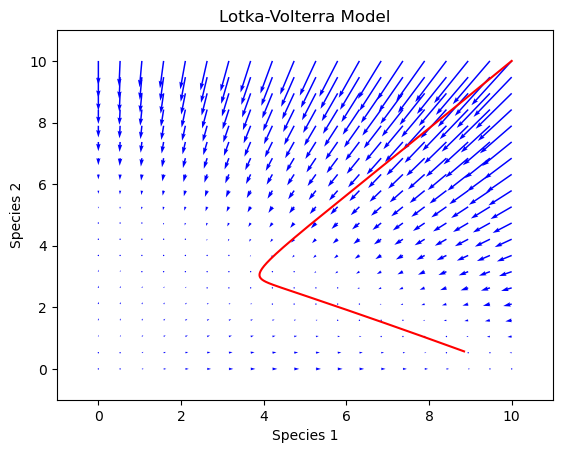

In [69]:
initial_populations = [10, 10]
growth_rates = [1.0, 1.0]
interactions = [[-0.1, -0.2], [-0.1, -0.22]]
plot_quiver_2D(initial_populations, growth_rates, interactions, total_time=100)

## Make an interactive plot
- The `generalized_lotka_volterra` funtion is the funtion for the generalized Lotka-Volterra model.
- The `solve_system` function solves the system of differential equations given an interaction matrix A, which defines the interactions between species. 
- The `interactive_lotka_volterra` function creates an interactive set of widgets to control the number of species, the interaction strengths between them (through the interaction matrix A), and the maximum time for the simulation.

In [9]:
def generalized_lotka_volterra(X, t, growth_rates, interactions):
    return [x * (growth_rates[i] + sum([interactions[i][j] * X[j] for j in range(len(X))])) for i, x in enumerate(X)]

def solve_system(num_species, t_max, growth_rates, interactions):
    # Initial population sizes
    X0 = np.random.uniform(0.5, 1.5, size=num_species)
    # Time points
    t = np.linspace(0, t_max, 1000)
    # Reshape interaction matrix
    interactions_matrix = np.array(interactions).reshape(num_species, num_species)
    # Solve ODE
    X = odeint(generalized_lotka_volterra, X0, t, args=(growth_rates, interactions_matrix))
    # Plot results
    plt.figure(figsize=(12, 6))
    for i in range(num_species):
        plt.plot(t, X[:, i], label=f'Species {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

def interactive_lotka_volterra(num_species=3):
    t_max = FloatSlider(min=10, max=100, step=1, value=50, description='Time:')
    growth_rates = [FloatSlider(min=-1, max=2, step=0.1, value=np.random.uniform(-0.5, 1), description=f'Growth Rate {i+1}') for i in range(num_species)]
    interactions = [FloatSlider(min=-2, max=2, step=0.1, value=np.random.uniform(-1, 1), description=f'Interaction {i+1},{j+1}') for i in range(num_species) for j in range(num_species)]
    
    def update(t_max, **kwargs):
        growth_rates_values = [kwargs[f'Growth Rate {i+1}'] for i in range(num_species)]
        interactions_values = [kwargs[f'Interaction {i+1},{j+1}'] for i in range(num_species) for j in range(num_species)]
        solve_system(num_species, t_max, growth_rates_values, interactions_values)
    
    interact(update, t_max=t_max, **{gr.description: gr for gr in growth_rates}, **{inter.description: inter for inter in interactions})

# Run the interactive model with a default of 3 species
interactive_lotka_volterra(num_species=2)


interactive(children=(FloatSlider(value=50.0, description='Time:', min=10.0, step=1.0), FloatSlider(value=0.71…